In [17]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
import scipy as Sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [19]:
house_df = pd.read_csv(r'data\train.csv')
house_test_df = pd.read_csv(r'data\test.csv')

In [20]:
print('데이터 크기 ', 'rows :', house_df.shape[0], ',columns:',house_df.shape[1])

데이터 크기  rows : 1460 ,columns: 81


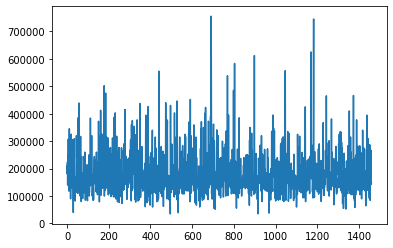

In [21]:
plt.plot(house_df['SalePrice']) #plt 메서드 내 plot

<AxesSubplot:>

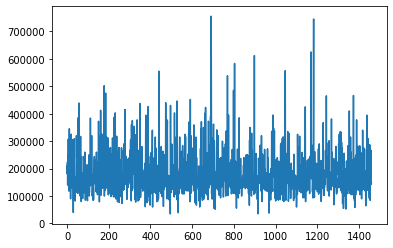

In [22]:
house_df['SalePrice'].plot() #pandas datafrem 내 메소드 

In [23]:
data_df = house_df.drop(columns="SalePrice")

In [24]:
data_df # 널이 좀 많네? 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [25]:
house_df.isnull().count()


Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [26]:
data_df = house_df.select_dtypes(include=['object']).copy()
data_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [74]:
data_df2 = house_df.select_dtypes(include=['float64', 'int']).copy()
data_df2.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [73]:
print(data_df['Neighborhood'].dtype)
print(data_df['Utilities'].dtype)
print(house_df['YearBuilt'].dtype)

object
object
int64


<AxesSubplot:>

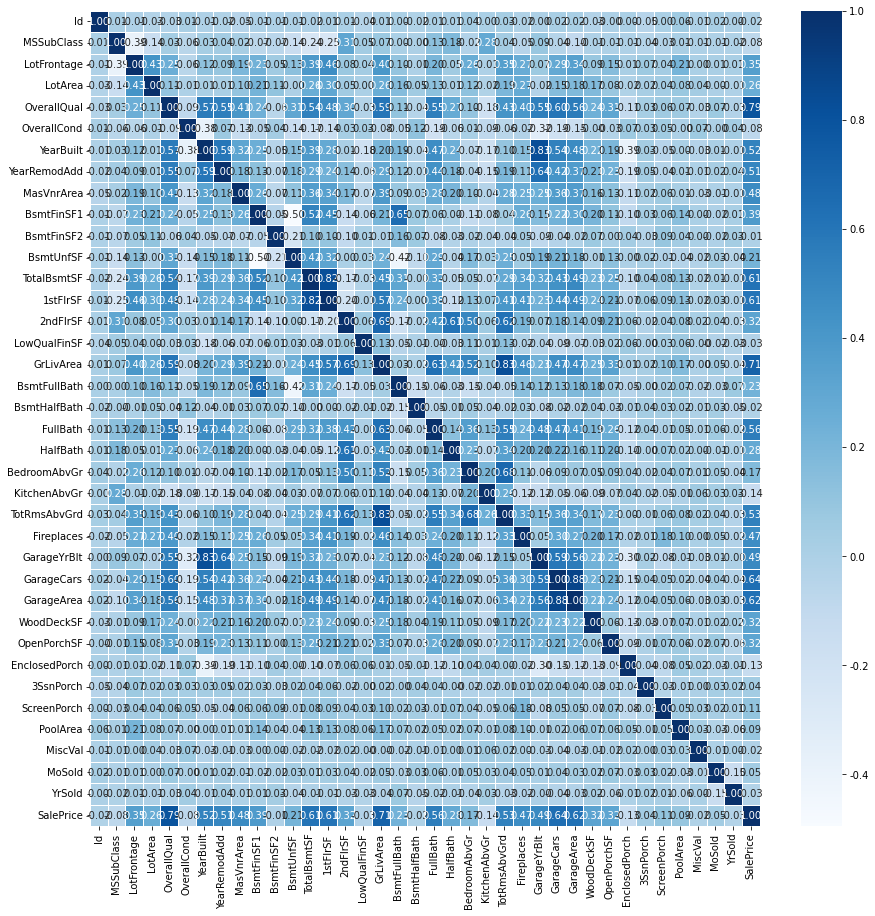

In [75]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data_df2.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

#음이드 양이든 1에 가까울 수록 경향성이 비슷하다..벗 임마는..!ㅎ 선형회귀보단 디시젼 트리가 더 적합하겠다!

In [31]:
data_df2['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
print(data_df['Neighborhood'].dtype)
print(data_df['Utilities'].dtype)
print(house_df['YearBuilt'].dtype)

In [77]:
house_df[['Utilities', 'SalePrice']].groupby(['Utilities'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

,Utilities,SalePrice
0,AllPub,180950.95682
1,NoSeWa,137500.00000


In [45]:
data_df2= data_df2.dropna()
x= data_df2.drop(['SalePrice','Id'],axis=1)
y= data_df2['SalePrice']

In [49]:
x_train = sm.add_constant(x)
model = sm.OLS(y, x_train, axis=1)
model_trianed = model.fit()
print(model_trianed.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     135.7
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:31:38   Log-Likelihood:                -13358.
No. Observations:                1121   AIC:                         2.679e+04
Df Residuals:                    1086   BIC:                         2.696e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.232e+05    1.7e+06     -0.190

C:\Users\ljs83\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['axis']
  warnings.warn(msg, ValueWarning)


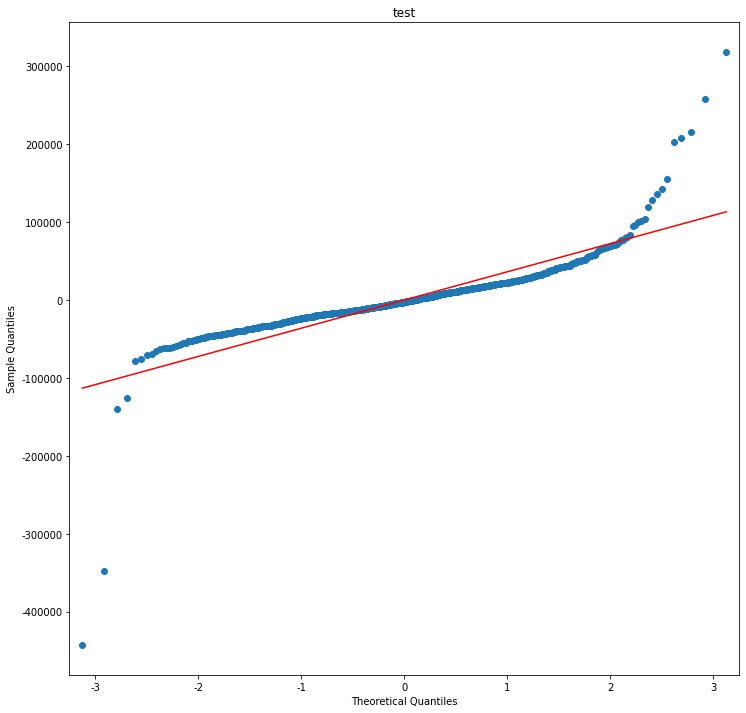

In [56]:
model_residuals= model_trianed.resid
plt.rcParams['axes.unicode_minus']=False
fig, ax =plt.subplots(1,1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s',ax=ax)
ax.title.set_text('test')

C:\Users\ljs83\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


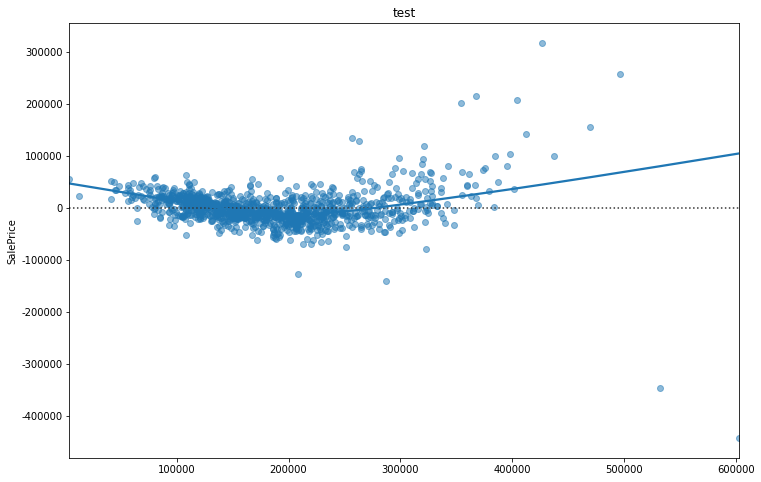

In [57]:
model_fitted_y= model_trianed.fittedvalues

plt.rcParams['axes.unicode_minus']=False
fig, ax =plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y,y, data=x_train, lowess=True, scatter_kws={'alpha':0.5},ax=ax)

ax.title.set_text('test')